# Predicting Molecular Properties ([Kaggle](https://www.kaggle.com/c/champs-scalar-coupling))
## Can you measure the magnetic interactions between a pair of atoms? 
### GitHub repository: https://github.com/comchem/Predicting-Molecular-Properties

### Project Leader : Min-seok Kye

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/tidy_df.csv', index_col=0)
df.head()

E:\DataMining\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,XX0,...,atom1,x1,y1,z1,potential_energy,mulliken_charge_0,mulliken_charge_1,dipol_X,dipol_Y,dipol_Z
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,31.3410,...,C,-0.012698,1.085804,0.008001,-40.52368,0.133921,-0.535689,0.0,0.0,0.0
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,31.3410,...,H,1.011731,1.463751,0.000277,-40.52368,0.133921,0.133922,0.0,0.0,0.0
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,31.3410,...,H,-0.540815,1.447527,-0.876644,-40.52368,0.133921,0.133923,0.0,0.0,0.0
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,31.3410,...,H,-0.523814,1.437933,0.906397,-40.52368,0.133921,0.133923,0.0,0.0,0.0
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,31.5814,...,C,-0.012698,1.085804,0.008001,-40.52368,0.133922,-0.535689,0.0,0.0,0.0


In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=5, test_size=0.01, random_state=42)
for train_index, test_index in split.split(df, df["type"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [11]:
strat_test_set.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,XX0,...,atom1,x1,y1,z1,potential_energy,mulliken_charge_0,mulliken_charge_1,dipol_X,dipol_Y,dipol_Z
3553787,-1.38991,dsgdb9nsd_102175,14,3,2JHC,-1.48282,0.054451,-0.036173,0.074627,31.6530,...,C,-1.999639,-0.298597,-1.465747,-351.3195,0.075747,-0.364865,-0.7399,-0.0330,0.2167
637160,3.84256,dsgdb9nsd_020059,9,10,3JHH,3.79600,0.102821,0.539745,-0.596002,31.5899,...,H,1.955998,0.934263,-0.824014,-328.0712,0.114667,0.115010,-0.0941,-0.1189,1.0303
1981070,-4.47738,dsgdb9nsd_062762,9,1,2JHC,-4.68998,0.099484,0.021313,0.091807,33.7363,...,C,0.086609,0.021992,0.062455,-439.2379,0.153968,0.215049,-3.8834,-0.9305,1.3663
3321492,1.72888,dsgdb9nsd_095818,17,18,3JHH,1.61279,0.047213,0.572386,-0.503503,29.1319,...,H,-0.140737,-4.200395,2.137453,-424.4069,0.073095,0.280292,0.1200,-1.1788,1.4414
2992146,6.20550,dsgdb9nsd_088127,15,17,3JHH,5.82839,0.155483,-0.250148,0.471776,30.8112,...,H,-0.094328,-0.161550,3.938505,-439.2645,0.120612,0.122662,-1.2385,-3.2886,-0.5098


In [6]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index2, test_index2 in split.split(strat_test_set, strat_test_set["type"]):
    strat_train_set2 = df.loc[train_index2]
    strat_test_set2 = df.loc[test_index2]

In [13]:
strat_test_set2.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,XX0,...,atom1,x1,y1,z1,potential_energy,mulliken_charge_0,mulliken_charge_1,dipol_X,dipol_Y,dipol_Z
18639,-8.204660,dsgdb9nsd_000972,9,1,2JHC,-8.293430,0.134639,-0.065002,0.019128,30.7668,...,C,-0.033814,0.059308,0.031914,-360.6422,0.137688,0.239952,-0.2938,-0.3714,0.0026
12174,-0.060427,dsgdb9nsd_000608,9,2,2JHC,0.130439,-0.043316,0.127915,-0.275464,28.8989,...,C,1.311477,-0.680216,-0.171180,-270.5532,0.102111,-0.297558,-3.2246,0.6590,0.3435
14008,4.762370,dsgdb9nsd_000673,15,3,3JHC,4.898340,-0.007139,0.328367,-0.457200,32.4480,...,C,1.180504,-0.451415,2.038932,-234.6493,0.075479,-0.218893,-0.0889,0.0000,-0.1497
7063,3.691140,dsgdb9nsd_000387,12,4,3JHC,4.121040,-0.061957,-0.487346,0.119401,30.4232,...,C,-0.003547,-0.922073,-2.365139,-287.8511,0.169245,0.154222,-3.7182,0.3822,0.8100
14760,-1.504330,dsgdb9nsd_000706,6,2,2JHC,-1.383160,-0.127965,0.240488,-0.233698,29.7247,...,C,-0.311916,0.114897,0.024424,-306.4097,0.135791,0.051666,0.0000,0.0000,1.9030


In [21]:
train = pd.get_dummies(strat_train_set2, columns=['type', 'atom1'], drop_first=True)
train.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,fc,sd,pso,dso,XX0,YX0,...,dipol_Z,type_1JHN,type_2JHC,type_2JHH,type_2JHN,type_3JHC,type_3JHH,type_3JHN,atom1_H,atom1_N
4437,8.223640,dsgdb9nsd_000244,9,10,8.669140,0.000058,0.069788,-0.515346,26.8062,4.9464,...,0.0000,0,0,0,0,0,1,0,1,0
10939,0.511641,dsgdb9nsd_000554,9,2,0.561419,-0.040934,0.110465,-0.119309,32.6256,0.0003,...,0.9009,0,0,0,0,1,0,0,0,0
12241,14.417400,dsgdb9nsd_000609,12,3,14.704700,0.002848,-0.268422,-0.021744,23.5665,0.4354,...,-0.4179,0,0,0,1,0,0,0,0,1
247,3.069140,dsgdb9nsd_000021,6,7,3.028950,0.075471,0.386576,-0.421856,31.0606,-3.1355,...,-0.0897,0,0,0,0,0,1,0,1,0
23060,-0.078387,dsgdb9nsd_001149,15,0,-0.051995,0.000129,0.099610,-0.126130,27.3628,-0.0001,...,-0.0002,0,0,0,0,1,0,0,0,0


In [22]:
test = pd.get_dummies(strat_test_set2, columns=['type', 'atom1'], drop_first=True)
test.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,fc,sd,pso,dso,XX0,YX0,...,dipol_Z,type_1JHN,type_2JHC,type_2JHH,type_2JHN,type_3JHC,type_3JHH,type_3JHN,atom1_H,atom1_N
18639,-8.204660,dsgdb9nsd_000972,9,1,-8.293430,0.134639,-0.065002,0.019128,30.7668,2.0417,...,0.0026,0,1,0,0,0,0,0,0,0
12174,-0.060427,dsgdb9nsd_000608,9,2,0.130439,-0.043316,0.127915,-0.275464,28.8989,1.5462,...,0.3435,0,1,0,0,0,0,0,0,0
14008,4.762370,dsgdb9nsd_000673,15,3,4.898340,-0.007139,0.328367,-0.457200,32.4480,5.6314,...,-0.1497,0,0,0,0,1,0,0,0,0
7063,3.691140,dsgdb9nsd_000387,12,4,4.121040,-0.061957,-0.487346,0.119401,30.4232,1.0304,...,0.8100,0,0,0,0,1,0,0,0,0
14760,-1.504330,dsgdb9nsd_000706,6,2,-1.383160,-0.127965,0.240488,-0.233698,29.7247,1.9099,...,1.9030,0,1,0,0,0,0,0,0,0


In [23]:
import pandas as pd
import numpy as np

X_train = train.drop(['scalar_coupling_constant', 'molecule_name', 'atom_index_0', 'atom_index_1', 'atom0'], axis=1).values
y_train = train['scalar_coupling_constant'].values

X_test = test.drop(['scalar_coupling_constant', 'molecule_name', 'atom_index_0', 'atom_index_1', 'atom0'], axis=1).values
y_test = test['scalar_coupling_constant'].values

type(X_test)

numpy.ndarray

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## Model by Light GB

In [54]:
import lightgbm as lgb

#train_ds = lgb.Dataset(X_train, label=train, categorical_feature=['type', 'atom1'])
#test_ds = lgb.Dataset(X_test, label=test, categorical_feature=['type', 'atom1'])

train_ds = lgb.Dataset(X_train_std, label=y_train)
test_ds = lgb.Dataset(X_test_std, label=y_test)

#train_ds = lgb.Dataset(X_train, label=y_train)
#test_ds = lgb.Dataset(X_test, label=y_test)

params_lgb = {'application': 'regression_l1',
              'metric': 'l1',
              'num_leaves': 90,
              'max_depth': 7,
              'learning_rate': 1,
              'bagging_freq' : 1,
              'bagging_fraction': 0.9,
              'feature_fraction': 0.9,
              'min_split_gain': 0.02,
              'min_child_samples': 50,
              'min_child_weight': 0.01,
              'lambda_l2': 0.05,
              'lambda_l1': 0.01,
              'verbosity': -1,
              'data_random_seed': 17}

model = lgb.train(params_lgb, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l1: 1.2077
Early stopping, best iteration is:
[63]	valid_0's l1: 1.20454


In [62]:
#predict_train = model.predict(X_train)
#predict_test = model.predict(X_test)

predict_train = model.predict(X_train_std)
predict_test = model.predict(X_test_std)

print(predict_test[:10])
print(y_test[:10])

[-8.42298070e+00 -4.15030737e-02  4.98407881e+00  3.75336011e+00
 -1.44567836e+00  1.72183502e+00  4.55878519e+01 -1.06053254e+01
 -7.95451528e+00 -7.58203077e+00]
[ -8.20466   -0.060427   4.76237    3.69114   -1.50433    1.58976
  48.2738   -11.0092    -8.08686   -8.04018 ]


In [56]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)

In [57]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  53.2977720449482
R2 score:  0.9608794043745931


In [58]:
final_result = pd.concat([pd.DataFrame(y_test), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['label','predict']

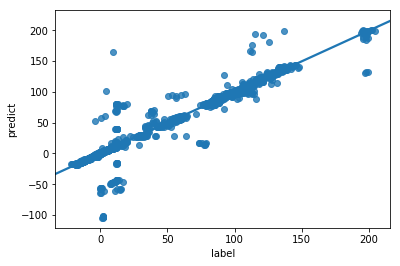

In [59]:
import seaborn as sns

sns.regplot(x = 'label', y = 'predict', data = final_result)

## Feature Selection by Lasso

['sd' 'pso' 'dso' 'XX0' 'YX0' 'ZX0' 'XY0' 'YY0' 'ZY0' 'XZ0' 'YZ0' 'ZZ0'
 'XX1' 'YX1' 'ZX1' 'XY1' 'YY1' 'ZY1' 'XZ1' 'YZ1' 'ZZ1' 'x0' 'y0' 'z0' 'x1'
 'y1' 'z1' 'potential_energy' 'mulliken_charge_0' 'mulliken_charge_1'
 'dipol_X' 'dipol_Y' 'dipol_Z' 'type_1JHN' 'type_2JHC' 'type_2JHH'
 'type_2JHN' 'type_3JHC' 'type_3JHH' 'type_3JHN' 'atom1_H' 'atom1_N']
[ 0.         -0.          0.61905919 -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
  0.          0.         -0.         -0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.        ]


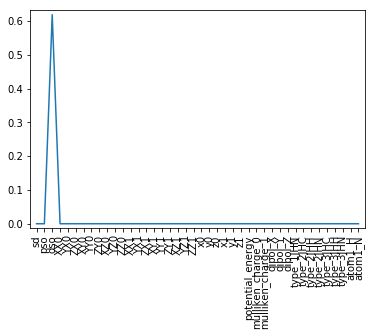

In [48]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

df = train.drop(['scalar_coupling_constant', 'molecule_name', 'atom_index_0', 'atom_index_1', 'atom0', 'fc'], axis=1)
df_columns = df.columns
print(df_columns.values)

X_train_l = train.drop(['scalar_coupling_constant', 'molecule_name', 'atom_index_0', 'atom_index_1', 'atom0', 'fc'], axis=1).values
y_train_l = train['scalar_coupling_constant'].values

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.1, normalize=True )

lasso.fit(X_train_l,y_train_l)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=90)
plt.margins(0.02)
plt.show()